# Module 3: Churn Prediction Project

In [78]:
# imports
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt 
import seaborn as sns
from pypalettes import load_cmap

%matplotlib inline
pd.options.display.float_format = '{:.5f}'.format
cmap = load_cmap("X84")
palette = cmap.colors

## 3.2 Data Preparation

In this section we will prepare the data before we make any test train splits. This involves updating any formatting and making adjustments to data types of columns.

In [2]:
data_path = "./data/Customer-Churn-Dataset.csv"

In [3]:
df = pd.read_csv(data_path)

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


We are going to do a similar transformation of the column names and categorical features so there is consistency in formatting.

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in categorical_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [7]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [8]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

We can identify that senior citizen is a categorical column even though it's a `int` data type.  We can also determine that `totalcharges` should be a float type but there is something that is stopping this.

They used spaces to replace null values and we replaced those with `_`.

In [9]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [10]:
#pd.to_numeric(df.totalcharges)

In [11]:
pd.to_numeric(df.totalcharges, errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [12]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [13]:
df[tc.isnull()].T

,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
customerid,4472-lvygi,3115-czmzd,5709-lvoeq,4367-nuyao,1371-dwpaz,7644-omvmy,3213-vvolg,2520-sgtta,2923-arzlg,4075-wkniu,2775-sefee
gender,female,male,female,male,female,male,male,female,male,female,male
seniorcitizen,0,0,0,0,0,0,0,0,0,0,0
partner,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,no
dependents,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes
tenure,0,0,0,0,0,0,0,0,0,0,0
phoneservice,no,yes,yes,yes,no,yes,yes,yes,yes,yes,yes
multiplelines,no_phone_service,no,no,yes,no_phone_service,no,yes,no,no,yes,yes
internetservice,dsl,no,dsl,no,dsl,no,no,no,no,dsl,dsl
onlinesecurity,yes,no_internet_service,yes,no_internet_service,yes,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no,yes


_Could we use the average term length of the data set and the monthly spend of those missing total spend to impute a total spend instead of just replacing with zero?_

In [14]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [15]:
df.totalcharges = df.totalcharges.fillna(0)

### Target Variable Prep

We need to convert the churn column from object to 0 or 1 for binary classification.

We do this by creating a mask that provides true and false values for each element of the series which can then be converted to an int type.

In [16]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [17]:
df.churn == 'yes'

0       False
1       False
2        True
3       False
4        True
        ...  
7038    False
7039    False
7040    False
7041     True
7042    False
Name: churn, Length: 7043, dtype: bool

In [18]:
df.churn = (df.churn == 'yes').astype(int)

## 3.3 Setting up the validation framework

In this section we will perform the train validation test split using the scikit learn method `train_test_split`.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [21]:
len(df_full_train), len(df_test)

(5634, 1409)

In [22]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [23]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [24]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
6302,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
727,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
5104,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,...,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55,0
6108,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80,0
1530,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,...,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05,1
3701,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95,0


In [25]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [26]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,...,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55,0
4221,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80,0
4222,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,...,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05,1
4223,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95,0


In [27]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [28]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

## 3.4 EDA

In this section we will check missing values, explore the target variable, and explore the numerical and categorical features.

In [29]:
df_full_train = df_full_train.reset_index(drop=True)

In [30]:
df_full_train.head().T

,0,1,2,3,4
customerid,5442-pptjy,6261-rcvns,2176-osjuv,6161-erdgd,2364-ufrom
gender,male,female,male,male,male
seniorcitizen,0,0,0,0,0
partner,yes,no,yes,yes,no
dependents,yes,no,no,yes,no
tenure,12,42,71,71,30
phoneservice,yes,yes,yes,yes,yes
multiplelines,no,no,yes,yes,no
internetservice,no,dsl,dsl,dsl,dsl
onlinesecurity,no_internet_service,yes,yes,yes,yes


### Target variable exploration

In [31]:
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [32]:
# as a percentage
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [33]:
df_full_train.churn.mean()

np.float64(0.26996805111821087)

In [34]:
full_train_churn_rate = df_full_train.churn.mean()

Because the target varaiable is binary (0 or 1) the mean is the same as the churn rate as it counts the number of ones in the series.

### Categorical Features

In [35]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [36]:
categorical_columns = [
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
]

In [37]:
df_full_train[categorical_columns].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### Numerical Features

In [38]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [39]:
numerical_cols = ['tenure', 'monthlycharges', 'totalcharges']

## 3.5 Feature Importance: Churn Rate and risk ratio

In this specific part of EDA we will explore which features have the most impact on our target variable.

In [40]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [41]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [42]:
full_train_churn_rate - churn_female

np.float64(-0.006855983216553063)

In [43]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [44]:
full_train_churn_rate - churn_male

np.float64(0.006754520462819769)

In [45]:
df_full_train.partner.value_counts()


partner
no     2932
yes    2702
Name: count, dtype: int64

In [46]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [47]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

In [48]:
full_train_churn_rate - churn_partner

np.float64(0.06493474245795922)

In [49]:
full_train_churn_rate - churn_no_partner

np.float64(-0.05984095297455855)

Here we can see a significant difference in churn rate for those customers with or without partners. When compared with the impact of gender there was very little difference. This tells us that partner may have more importance as a features in predicting churn than gender does.



### Risk Ratio

In [50]:
churn_female / full_train_churn_rate

np.float64(1.0253955354648652)

In [51]:
churn_male / full_train_churn_rate

np.float64(0.9749802969838747)

In [52]:
churn_partner / full_train_churn_rate

np.float64(0.7594724924338315)

In [53]:
churn_no_partner / full_train_churn_rate

np.float64(1.2216593879412643)

In [54]:
df_full_train.groupby('gender').churn.agg(['mean', 'count'])

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [55]:
# To allow to print the result of the for loop each iteration
from IPython.display import display

In [56]:
# For each categorical variable find the churn rate and count of each category within, and then the two churn metrics
for category in categorical_columns:
    df_group = df_full_train.groupby(category).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - full_train_churn_rate
    df_group['risk'] = df_group['mean'] / full_train_churn_rate
    display(df_group)

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


From this we can see a number of variables seem to have a relation to the global churn rate, and so be important features. In the next section we will explore methods to score the feature importance.

## 3.6 Feature Importance: Mutual Information

Mutual information is a method for measuring the importance of categorical variables. It is a concept from information theory.

In [57]:
from sklearn.metrics import mutual_info_score

In [58]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [59]:
for category in categorical_columns:
    mi_score = mutual_info_score(df_full_train[category], df_full_train.churn)
    print(f"{category.capitalize()} mutual information score: {mi_score:.3f}")
    print()

Gender mutual information score: 0.000

Seniorcitizen mutual information score: 0.009

Partner mutual information score: 0.010

Dependents mutual information score: 0.012

Phoneservice mutual information score: 0.000

Multiplelines mutual information score: 0.001

Internetservice mutual information score: 0.056

Onlinesecurity mutual information score: 0.063

Onlinebackup mutual information score: 0.047

Deviceprotection mutual information score: 0.043

Techsupport mutual information score: 0.061

Streamingtv mutual information score: 0.032

Streamingmovies mutual information score: 0.032

Contract mutual information score: 0.098

Paperlessbilling mutual information score: 0.018

Paymentmethod mutual information score: 0.043



In [60]:
def mutual_info_churn_score(series: pd.Series):
    return mutual_info_score(series, df_full_train.churn)

In [61]:
df_full_train[categorical_columns].apply(mutual_info_churn_score).sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## 3.7 Feature Importance: Correlation

Correlation is a way that we can we can measure dependency between 2 numerical variables.

Pearsons correlation coeffiecient is the standard typically used. Correlation coefficient values fall between -1 and 1. 

In [62]:
df_full_train.tenure.max()

np.int64(72)

In [63]:
df_full_train[numerical_cols]

,tenure,monthlycharges,totalcharges
0,12,19.70,258.35
1,42,73.90,3160.55
2,71,65.15,4681.75
3,71,85.45,6300.85
4,30,70.40,2044.75
...,...,...,...
5629,9,100.50,918.60
5630,60,19.95,1189.90
5631,28,105.70,2979.50
5632,2,54.40,114.10


In [64]:
# By default corrwith uses pearsons correlation
df_full_train[numerical_cols].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [70]:
from scipy.stats import pointbiserialr
df_full_train[numerical_cols].corrwith(df_full_train.churn, method=pointbiserialr)

,tenure,monthlycharges,totalcharges
0,-0.35189,0.19681,-0.19635
1,0.00000,0.00000,0.00000


We can see here if we test the more appropriate correlation method of point biserial correlation, we get the same result, so it is not necessary to perform it. Pearsons cofficient is sufficient.

As for the results. Tenure seems to be negatively correlated with churn as with total charges but to a lesser degree. Mothily charges though seem to be weakly positively correlated with churn.

We can also create filters for these columns to get a better understanding of what values of tenure for instance has the most impact on churn.

### Churn vs Tenure

In [71]:
# What is churn rate when tenure is less than 2 months
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [73]:
# What is churn rate when tenure is more than 2 months
df_full_train[df_full_train.tenure > 2].churn.mean()

np.float64(0.22478269658378816)

In [74]:
# What is churn rate when tenure is more than 2 months and less than 12
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

In [75]:
# What is churn rate when tenure is more than 12 months
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

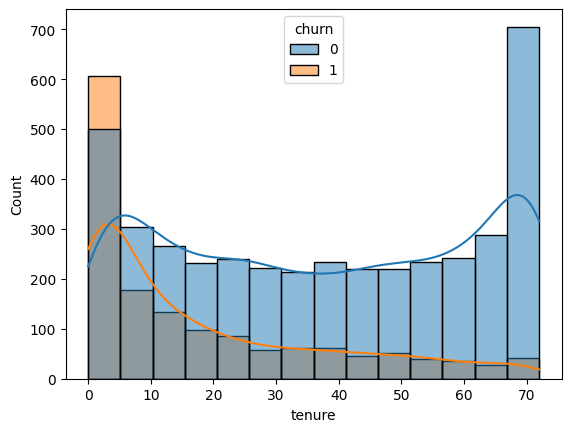

In [80]:
sns.histplot(data=df_full_train,x='tenure',kde=True,hue='churn')
plt.show()

### Churn vs Monthly Charges

In [81]:
# What is churn rate when monthly charge is less than 20
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

np.float64(0.08795411089866156)

In [82]:
# What is churn rate when monthly charge is more than 20
df_full_train[df_full_train.monthlycharges > 20].churn.mean()

np.float64(0.28859323028761497)

In [84]:
# What is churn rate when monthly charge is more than 20 and less than 50
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

np.float64(0.18340943683409436)

In [85]:
# What is churn rate when monthly charge is more than 50
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

np.float64(0.32499341585462205)

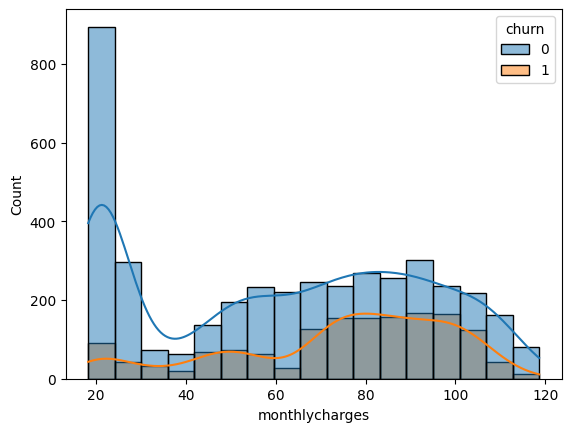

In [83]:
sns.histplot(data=df_full_train,x='monthlycharges',kde=True,hue='churn')
plt.show()

## 3.8 One hot encoding

This time we will use the scikit-learn to perform the one hot encoding. This is a way to represent categorical variables that have no order in numerical terms. This expands the dataset, representing a column with a number of columns that match the number of categories.

Why create ohe using `DictVectoriser` instead of `OneHotEncoder`?

### One Hot Encoding Using DictVectorizer

- Convert columns to dictionaries where each dictionary reflects one record (row) in the dataset.
- Create an instance of the DictVectoriser Class
- Fit the DictVectoriser instance to our data
- Transform the data using the fitted instance

If the dataset contained numerical columns it would skip it.


In [87]:
from sklearn.feature_extraction import DictVectorizer

In [90]:
df_train[['gender', 'contract']].iloc[:10].to_dict(orient='records')

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'}]

In [99]:
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient='records')

In [100]:
dv = DictVectorizer(sparse=False)

In [101]:
dv.fit(dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [102]:
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

In [103]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

Let's now implement this on our training
and validation data.

In [104]:
train_dicts = df_train[categorical_columns + numerical_cols].to_dict(orient='records')

In [105]:
dv = DictVectorizer(sparse=False)

In [111]:
# fit transform combines fit and transform functions into one step
X_train = dv.fit_transform(train_dicts)

In [110]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [112]:
val_dicts = df_val[categorical_columns + numerical_cols].to_dict(orient='records')

In [113]:
X_val = dv.fit_transform(val_dicts)

In [116]:
X_val.shape

(1409, 45)

## 3.9 Logistic Regression